In [22]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from network import solve_ode_network, signal_processing_on_hopf, smoothening_envelope, compute_envelope_fc
from scipy.stats import pearsonr
from scipy.signal import hilbert, butter, filtfilt
from scipy.signal import hilbert, hilbert2, savgol_filter, find_peaks
from scipy.interpolate import interp1d
from matplotlib.ticker import FixedLocator, FixedFormatter

In [2]:
mat = loadmat('../references/AAL78/C78.mat')
C = mat['C']
alpha = 0.2
C = alpha * C / np.max(C)

In [3]:
f=12
G=0.5
num_steps = 10000  # total steps
dt = 0.001  # time step
a = 0.0  # intrinsic dynamics parameters for each neuron
omega = 2 * np.pi * f  # angular frequencies for each neuron
beta = 3 # noise level

# x_values, _ = solve_ode_network(num_steps, dt, a, omega, beta, C, G)

# signal = x_values # r_values
# _, _, analytical_x, _, _, _ =  signal_processing_on_hopf(signal, C, dt, f=12, G=0.5)

(10000, 78)
(10000, 3003)
(10000, 10000)


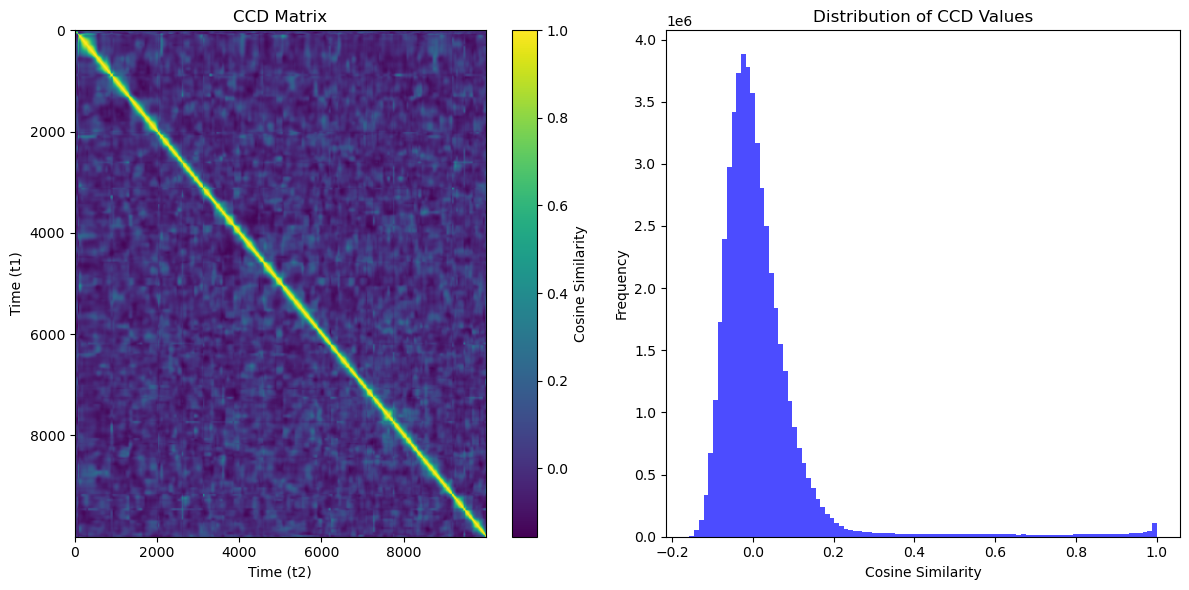

In [7]:
instantaneous_phase = np.angle(analytical_x)
print(instantaneous_phase.shape)
# Number of time points and brain regions
num_time_points, num_brain_regions = instantaneous_phase.shape

# Step 1: Calculate V(t) for each time step
V_t = []

for t in range(num_time_points):
    phase_diff = np.abs(instantaneous_phase[t, :, None] - instantaneous_phase[t, None, :])
    cos_phase_diff = np.cos(phase_diff)
    # We exclude the diagonal to not include the coherence of a node with itself
    np.fill_diagonal(cos_phase_diff, 0)
    V_t.append(cos_phase_diff[np.triu_indices(num_brain_regions, k=1)])
V_t = np.array(V_t)
print(V_t.shape)
# Step 2: Calculate the CCD matrix
CCD = np.corrcoef(V_t)
print(CCD.shape)
CCD_values = CCD[np.triu_indices_from(CCD, k=1)]

# Set up the figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Step 3: Plot the CCD matrix on the first subplot
im = axes[0].imshow(CCD, cmap='coolwarm', origin='lower', aspect='auto')
fig.colorbar(im, ax=axes[0], label='Cosine Similarity')
axes[0].set_title('CCD Matrix')
axes[0].set_xlabel('Time (t2)')
axes[0].set_ylabel('Time (t1)')
axes[0].invert_yaxis()  # Invert the y-axis

# Step 4: Plot the CCD distribution on the second subplot
axes[1].hist(CCD_values, bins=100, color='blue', alpha=0.7)
axes[1].set_title('Distribution of CCD Values')
axes[1].set_xlabel('Cosine Similarity')
axes[1].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [4]:
f=12
G=0.5
num_steps = 10000  # total steps
dt = 0.001  # time step
a = 0.0  # intrinsic dynamics parameters for each neuron
omega = 2 * np.pi * f  # angular frequencies for each neuron
beta = 0.5

In [47]:
def plot_ccd_dist(beta, dt, num_steps):
    CCD = np.load(f'./data/ccd_beta={beta}_tmax={dt*num_steps}.npy')
    print(CCD.shape)

    CCD_values = CCD[np.triu_indices_from(CCD, k=1)]

    # Set up the figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))  # 1 row, 2 columns

    # Plot the CCD matrix on the first subplot
    im = axes[0].imshow(CCD, cmap='turbo', origin='lower', aspect='auto')
    fig.colorbar(im, ax=axes[0], label='Cosine Similarity')
    axes[0].set_title('CCD Matrix')
    axes[0].set_xlabel('Time (t2)')
    axes[0].set_ylabel('Time (t1)')
    axes[0].invert_yaxis()  # Invert the y-axis

    # Customize tick labels to be divided by 1000
    xticks = axes[0].get_xticks()
    yticks = axes[0].get_yticks()
    axes[0].xaxis.set_major_locator(FixedLocator(xticks))
    axes[0].yaxis.set_major_locator(FixedLocator(yticks))
    axes[0].set_xticklabels([f"{x/1000:.0f}" for x in xticks])
    axes[0].set_yticklabels([f"{y/1000:.0f}" for y in yticks])

    # Plot the CCD distribution on the second subplot
    axes[1].hist(CCD_values, bins=100, color='blue', alpha=0.7)
    axes[1].set_title(f'Distribution of CCD Values for beta={beta}')
    axes[1].set_xlabel('Cosine Similarity')
    axes[1].set_ylabel('Count')

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()
    plt.show()

def plot_ccd_matrix(beta, dt, num_steps):
    # Load the CCD data
    CCD = np.load(f'./data/ccd_beta={beta}_tmax={dt*num_steps}.npy')
    print(f"CCD Matrix shape: {CCD.shape}")

    # Plotting the CCD matrix
    plt.figure(figsize=(4, 4))  # Adjust the figure size as needed
    im = plt.imshow(CCD, cmap='turbo', origin='lower', aspect='auto')
    plt.colorbar(im, label='Cosine Similarity')
    plt.title('CCD Matrix')
    plt.xlabel('Time (t2)')
    plt.ylabel('Time (t1)')
    plt.gca().invert_yaxis()  # Invert the y-axis

    # Customize tick labels to be divided by 1000
    xticks = plt.gca().get_xticks()
    yticks = plt.gca().get_yticks()
    plt.gca().xaxis.set_major_locator(FixedLocator(xticks))
    plt.gca().yaxis.set_major_locator(FixedLocator(yticks))
    plt.gca().set_xticklabels([f"{x/1000:.0f}" for x in xticks])
    plt.gca().set_yticklabels([f"{y/1000:.0f}" for y in yticks])

    plt.tight_layout()
    plt.show()

def plot_ccd_distribution(beta, dt, num_steps):
    # Load the CCD data
    CCD = np.load(f'./data/ccd_beta={beta}_tmax={dt*num_steps}.npy')
    CCD_values = CCD[np.triu_indices_from(CCD, k=1)]

    # Plotting the distribution of CCD values
    plt.figure(figsize=(4, 4))  # Adjust the figure size as needed
    plt.hist(CCD_values, bins=100, color='blue', alpha=0.7)
    plt.title(f'Distribution of CCD Values for beta={beta}')
    plt.xlabel('Cosine Similarity')
    plt.ylabel('Count')

    plt.tight_layout()
    plt.show()

CCD Matrix shape: (10000, 10000)


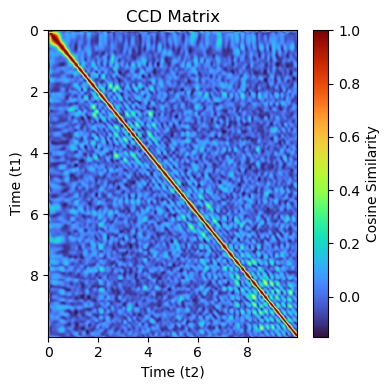

In [48]:
plot_ccd_matrix(0.5, 0.001, 10000)

(10000, 10000)


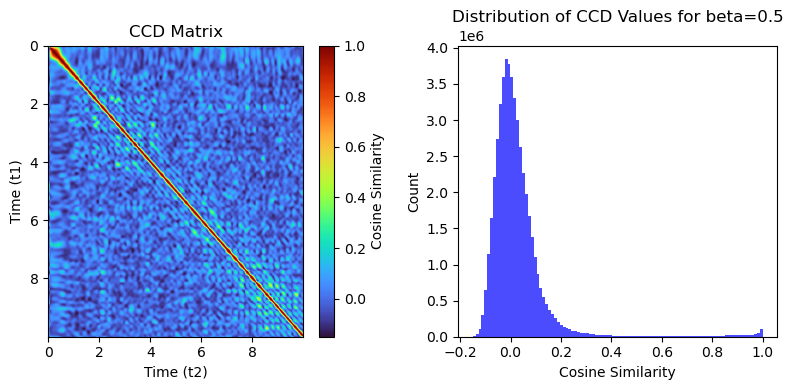

(15000, 15000)


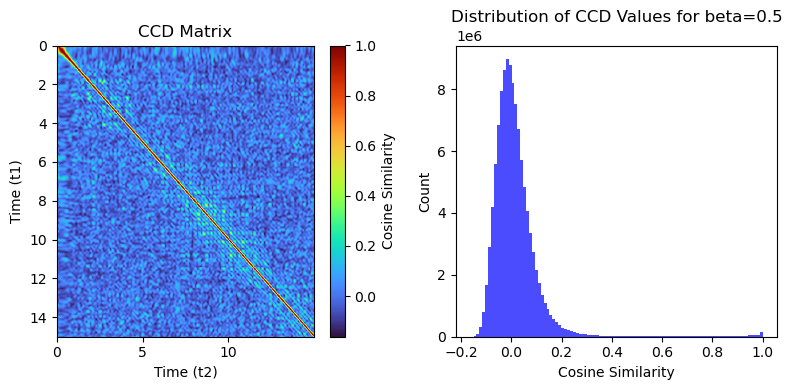

(20000, 20000)


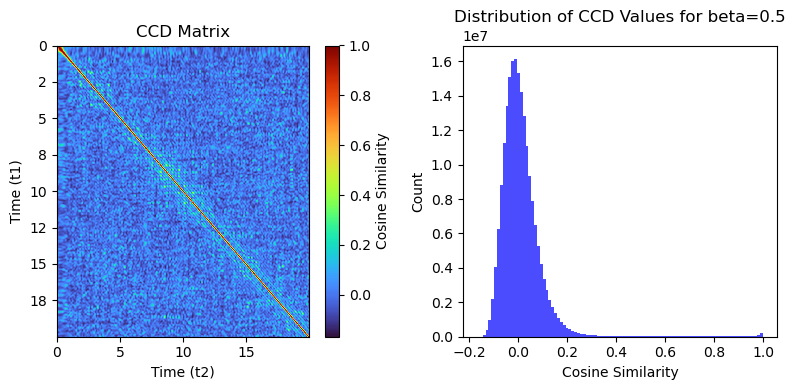

In [46]:
plot_ccd_dist(0.5, 0.001, 10000)
plot_ccd_dist(0.5, 0.001, 15000)
plot_ccd_dist(0.5, 0.001, 20000)

(10000, 10000)


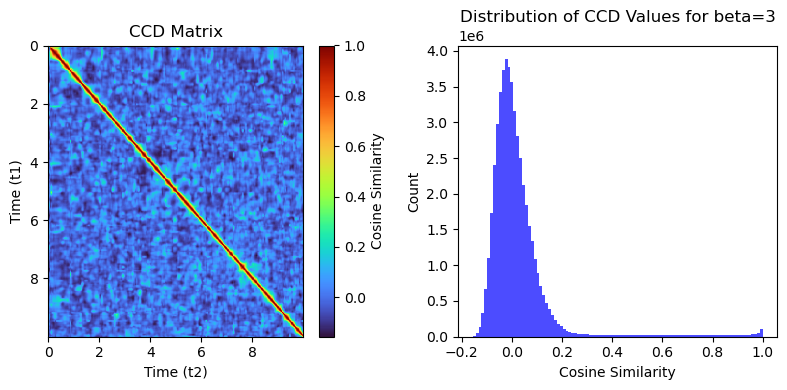

(15000, 15000)


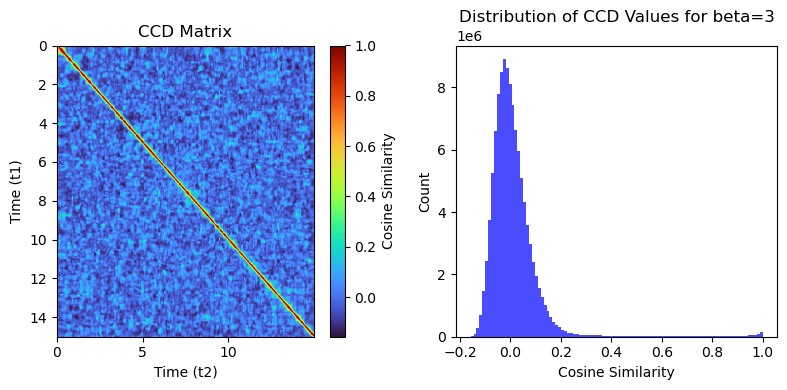

In [41]:
plot_ccd_dist(3, 0.001, 10000)
plot_ccd_dist(3, 0.001, 15000)

dt = 0.01, beta=5, tmax=50